## Bachelor Thesis
## "Exploring the Efficacy of Diverse Classification Techniques In Detecting Disinformation In News."
Ilia Sokolovskiy
HTW SS23

Notebook 2/5 - sklearn Models Predictions

**Installing all necessary dependencies**

In [ ]:
%%capture
!pip install numpy pandas matplotlib scipy scikit-learn tqdm

**Importing all necessary libraries**

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm.notebook import tqdm

from utils import split_data

**Loading the prepared data frame from a pickle**

In [2]:
# Load the pickle with the df
base_dir = "Data"
pickle_folder = "Pickles"
filename_pickle = "pickle_lg_df_2.pkl"

full_path_pickle = os.path.join(base_dir, pickle_folder, filename_pickle)

df = pd.read_pickle(full_path_pickle)

In [3]:
df.head()

,text,label,label_encoded,norp_count,gpe_count,vader_compound,cleaned_text,original_text_vector,cleaned_text_vector
0,Donald Trump just couldn t wish all Americans ...,FAKE,0,3,3,-0.8681,donald trump couldn t wish americans happy new...,"[-1.6619356, -0.0073223817, -1.6303111, -0.190...","[-0.17023614, 1.1278214, -2.2035916, -1.195557..."
1,House Intelligence Committee Chairman Devin Nu...,FAKE,0,10,5,-0.7141,house intelligence committee chairman devin nu...,"[-2.008067, 0.6831929, -1.9811207, 0.52264357,...","[-0.3486856, 0.6266792, -1.7451725, 0.01966631..."
2,"On Friday, it was revealed that former Milwauk...",FAKE,0,1,4,-0.9953,friday reveal milwaukee sheriff david clarke c...,"[-1.9425699, 0.0044210483, -1.7258451, 0.00323...","[-0.34773135, 0.7257386, -1.7822778, 0.2710289..."
3,"On Christmas day, Donald Trump announced that ...",FAKE,0,0,2,-0.9176,christmas day donald trump announce work follo...,"[-1.6670086, 0.23368433, -0.6346163, 0.1001595...","[-0.18105617, 0.730818, -0.28500575, -0.608257..."
4,Pope Francis used his annual Christmas Day mes...,FAKE,0,2,5,0.3134,pope francis annual christmas day message rebu...,"[-2.141846, 1.1239394, -2.4791837, 0.000615673...","[-0.003997393, 1.3095359, -2.2471106, -0.14267..."


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64429 entries, 0 to 78616
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  64429 non-null  object 
 1   label                 64429 non-null  object 
 2   label_encoded         64429 non-null  int64  
 3   norp_count            64429 non-null  int64  
 4   gpe_count             64429 non-null  int64  
 5   vader_compound        64429 non-null  float64
 6   cleaned_text          64429 non-null  object 
 7   original_text_vector  64429 non-null  object 
 8   cleaned_text_vector   64429 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.9+ MB
None


In [21]:
print(f"Vectors of original texts: {df['original_text_vector'].values[0][:10]} ...")
print(f"\nVectors of cleaned texts: {df['cleaned_text_vector'].values[0][:10]} ...")
print(f"\nShape of the vectors created by spaCy: {df['original_text_vector'].values[0].shape}")

Vectors of original texts: [-1.6619356  -0.00732238 -1.6303111  -0.19072783  2.7431827   0.07569402
  0.71905965  3.1006029   0.05636455 -0.91815954] ...

Vectors of cleaned texts: [-0.17023614  1.1278214  -2.2035916  -1.1955578   1.6034375   0.48677844
  1.4271044   3.1684027  -1.089497   -1.0168833 ] ...

Shape of the vectors created by spaCy: (300,)


In [22]:
# Data Split Variation Nr.1 (only Vectors of original texts)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['original_text_vector'])

Training set: 51543
Validation set: 6443
Test set: 6443


In [ ]:
# Data Split Variation Nr.2 (Number of Nationalities or Religious or Political Groups + Vader Compound + Vectors of original texts)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['norp_count', 'vader_compound', 'original_text_vector'])

In [ ]:
# Data Split Variation Nr.3 (Number of Geopolitical Entities + Vader Compound + Vectors of original texts)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['gpe_count', 'vader_compound', 'original_text_vector'])

In [ ]:
# Data Split Variation Nr.4 (only Vectors of pre-processed texts)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['cleaned_text_vector'])

In [ ]:
# Data Split Variation Nr.5 (Number of Nationalities or Religious or Political Groups + Vader Compound + Vectors of pre-preocessed texts)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['norp_count', 'vader_compound', 'cleaned_text_vector'])

In [ ]:
# Data Split Variation Nr.6 (Number of Geopolitical Entities + Vader Compound + Vectors of pre-processed texts)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(df,['gpe_count', 'vader_compound', 'cleaned_text_vector'])

In [23]:
# Scaling data for SVMs and KNeighborsClassifier as they are sensitive to feature scales
scaler_standard = StandardScaler().fit(X_train)
X_train_scaled = scaler_standard.transform(X_train)
X_val_scaled = scaler_standard.transform(X_val)
X_test_scaled = scaler_standard.transform(X_test)

In [24]:
# Scaling data for Multinomial NB to eliminate the negative vector values
scaler_min_max = MinMaxScaler().fit(X_train)
X_train_scaled_mnb = scaler_min_max.transform(X_train)
X_val_scaled_mnb = scaler_min_max.transform(X_val)
X_test_scaled_mnb = scaler_min_max.transform(X_test)

In [25]:
# Training NB, MNB, KNN, SVM and LSVM
models = {
    "Naive Bayes": GaussianNB(),
    "Multinomial NB": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Linear SVM": LinearSVC(dual='auto', max_iter=2000)
}

trained_models = {}

pbar = tqdm(total=len(models), desc="Training sklearn Models")

for name, model in models.items():
    pbar.set_description(f"Training {name}")
    if name in ["SVM", "Linear SVM", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
    elif name == "Multinomial NB":
        model.fit(X_train_scaled_mnb, y_train) 
    else:
        model.fit(X_train, y_train) 
    trained_models[name] = model
    pbar.update(1)

pbar.close()

Training sklearn Models:   0%|          | 0/5 [00:00<?, ?it/s]

In [26]:
# Evaluating NB, MNB, KNN, SVM and LSVM
model_scores = {}

for name, model in tqdm(trained_models.items(), desc="Evaluating Models"):
    if name in ["SVM", "Linear SVM", "K-Nearest Neighbors"]:
        preds = model.predict(X_val_scaled)
    elif name == "Multinomial NB":
        preds = model.predict(X_val_scaled_mnb)
    else: 
        preds = model.predict(X_val)
    
    score = accuracy_score(y_val, preds)

    # Print the classification report for the current model
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, preds))
    print("--------------------------------------------------------")

    model_scores[name] = score

best_model_name = max(model_scores, key=model_scores.get)
print(f"Best Model: {best_model_name} with Accuracy: {model_scores[best_model_name]}")

Evaluating Models:   0%|          | 0/5 [00:00<?, ?it/s]

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      3217
           1       0.68      0.86      0.76      3226

    accuracy                           0.72      6443
   macro avg       0.74      0.72      0.72      6443
weighted avg       0.74      0.72      0.72      6443

--------------------------------------------------------
Classification Report for Multinomial NB:

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      3217
           1       0.74      0.85      0.79      3226

    accuracy                           0.78      6443
   macro avg       0.79      0.78      0.78      6443
weighted avg       0.79      0.78      0.78      6443

--------------------------------------------------------
Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.94      0.88      0.91   

In [27]:
# Using train_test_split to sample down train data for faster and less compute resource costly fine-tuning
X_train_scaled_small, _, y_train_small, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=11)
print("Size of the scaled-down training set for fine-tuning:", len(X_train_scaled_small))

Size of the scaled-down training set for fine-tuning: 10308


In [28]:
# Check, whether the balance between two label classes remains intact (0 and 1)
unique, counts = np.unique(y_train_small, return_counts=True)

for u, c in zip(unique, counts):
    print(f"Count of {u}: {c}")

Count of 0: 5172
Count of 1: 5136


In [38]:
# Define the hyperparameter search space and use HalvingGridSearchCV for fine-tuning on 20% of the data
params = {
    'C': [0.5, 1, 5, 10, 20, 30, 50, 100],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

svm = SVC()
halving_search = HalvingGridSearchCV(svm, params, factor=2, verbose=3, cv=5, random_state=3)

halving_search.fit(X_train_scaled_small, y_train_small)
print(f"Best Parameters according to the HalvingGridSearchCV: {halving_search.best_params_}")

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1288
max_resources_: 10308
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 8
n_resources: 1288
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END C=0.5, gamma=scale, kernel=rbf;, score=(train=0.935, test=0.895) total time=   0.0s
[CV 2/5] END C=0.5, gamma=scale, kernel=rbf;, score=(train=0.938, test=0.887) total time=   0.0s
[CV 3/5] END C=0.5, gamma=scale, kernel=rbf;, score=(train=0.940, test=0.922) total time=   0.0s
[CV 4/5] END C=0.5, gamma=scale, kernel=rbf;, score=(train=0.939, test=0.872) total time=   0.0s
[CV 5/5] END C=0.5, gamma=scale, kernel=rbf;, score=(train=0.937, test=0.887) total time=   0.0s
[CV 1/5] END C=1, gamma=scale, kernel=rbf;, score=(train=0.966, test=0.911) total time=   0.0s
[CV 2/5] END C=1, gamma=scale, kernel=rbf;, score=(train=0.964, test=0.911) total time=   0.0s
[CV 3/5] END C=1, gamma=scale, kernel=rbf;, score=(train=0.970,

In [41]:
# Test accuracy of the model with the "best" fine-tuned hyperparameters
best_svm = halving_search.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)
print(f"Test Accuracy after fine-tuning on the 20% subset of train data: {test_accuracy * 100:.2f}%")

Test Accuracy on the 20% subset: 95.64%


In [46]:
# Final training and evaluation using test data
X_combined = np.concatenate([X_train, X_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)

scaler = StandardScaler().fit(X_combined)
X_combined_scaled = scaler.transform(X_combined)
X_test_scaled = scaler.transform(X_test)

best_model = SVC(C=10, probability=True)
best_model.fit(X_combined_scaled, y_combined)

test_preds = best_model.predict(X_test_scaled)
final_score = accuracy_score(y_test, test_preds)

print(f"Final Accuracy on Test Set: {final_score}")

Final Accuracy on Test Set: 0.9711314604997672


In [47]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, test_preds))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3244
           1       0.97      0.97      0.97      3199

    accuracy                           0.97      6443
   macro avg       0.97      0.97      0.97      6443
weighted avg       0.97      0.97      0.97      6443


In [48]:
# Display confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_preds))


Confusion Matrix:
 [[3147   97]
 [  89 3110]]


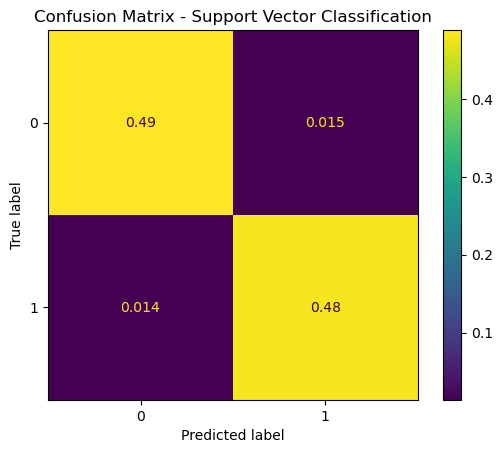

In [49]:
# Graphical confusion matrix
confusion_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, normalize='all')
plt.title("Confusion Matrix - Support Vector Classification")
plt.show()

In [50]:
# Define directories
base_dir = "Models"
pickle_folder = "Pickles"

# Save the model using pickle
model_filename = "best_sklearn_model_3.pkl"
full_path_model = os.path.join(base_dir, pickle_folder, model_filename)
with open(full_path_model, "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler using pickle
scaler_filename = "best_sklearn_model_scaler_3.pkl"
full_path_scaler = os.path.join(base_dir, pickle_folder, scaler_filename)
with open(full_path_scaler, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!
